In [329]:
# import the required libraries
import pandas as pd 

# impor from the pulp library the required functions
from pulp import LpMinimize, LpProblem, LpStatus, lpSum, LpVariable

import matplotlib.pyplot as plt

In [330]:
# load the data from the Diet_Problem_Products.xlsx file
df = pd.read_excel('004. Problem Input/Diet_Problem_Products.xlsx')

# display the data
print(df)

    ID        Type                                 Product  Quantity_Package  \
0    1        Meal                      Kraft Mac & Cheese               3.0   
1    2        Meal                     Amy's Thai Pad Thai               1.0   
2    3        Meal  Fresh Express Chopped Caesar Salad Kit               2.5   
3    4        Meal                        Spinach Scramble               2.0   
4    4  Ingredient                                    Eggs              12.0   
5    4  Ingredient                                   Onion               1.0   
6    4  Ingredient                     baby spinach leaves              10.0   
7    4  Ingredient                                    Salt             491.0   
8    5        Meal             Salmon, Rice, and Broccolis               4.0   
9    5  Ingredient                            Jasmine Rice               5.0   
10   5  Ingredient                                    Salt             491.0   
11   5  Ingredient                      

In [331]:
# filter the column Type on Meal
df = df[df['Type'] == 'Meal']

# reset the index
df = df.reset_index(drop=True)

# display the columns
print(df.columns)

# store columns to keep in a list
keep_columns = ['Product','Ref_Price', 'Ref_Energy',
       'Ref_Sodium', 'Ref_Protein', 'Ref_Vitamin D', 'Ref_Calcium', 'Ref_Iron',
       'Ref_Potassium']

# filter the columns
df = df[keep_columns]

# display the data
print(df)

Index(['ID', 'Type', 'Product', 'Quantity_Package', 'Metric_Package',
       'Price_Package', 'Quantity_Needed', 'Metric_Needed', 'Price_Needed',
       'Quantity_Ref', 'Metric_Ref', 'Conversion', 'Ref_Price', 'Ref_Energy',
       'Ref_Sodium', 'Ref_Protein', 'Ref_Vitamin D', 'Ref_Calcium', 'Ref_Iron',
       'Ref_Potassium', 'Reference', 'Reference_2'],
      dtype='object')
                                  Product  Ref_Price  Ref_Energy  Ref_Sodium  \
0                      Kraft Mac & Cheese   0.463333  250.000000  560.000000   
1                     Amy's Thai Pad Thai   6.790000  410.000000  760.000000   
2  Fresh Express Chopped Caesar Salad Kit   1.796000  160.000000  310.000000   
3                        Spinach Scramble   1.160264  161.666667  458.166667   
4             Salmon, Rice, and Broccolis   3.831395  322.500000  549.250000   
5                      Fat Free Skim Milk   0.463333   80.000000  120.000000   

   Ref_Protein  Ref_Vitamin D  Ref_Calcium  Ref_Iron  Ref_Po

In [332]:
# create the table of the nutrients using markdown
# remove index

print(df.round(2).to_markdown(index=False))

# save the table of the nutrients using markdown
# remove index
df.round(2).to_markdown('003. Tables/nutrients.md', index=False)

# create the table of the nutrients using csv
# remove index
df.to_csv('003. Tables/nutrients.csv', index=False)

| Product                                |   Ref_Price |   Ref_Energy |   Ref_Sodium |   Ref_Protein |   Ref_Vitamin D |   Ref_Calcium |   Ref_Iron |   Ref_Potassium |
|:---------------------------------------|------------:|-------------:|-------------:|--------------:|----------------:|--------------:|-----------:|----------------:|
| Kraft Mac & Cheese                     |        0.46 |       250    |       560    |          9    |             0   |        110    |       2.5  |          330    |
| Amy's Thai Pad Thai                    |        6.79 |       410    |       760    |         12    |             0   |         90    |       3.9  |          360    |
| Fresh Express Chopped Caesar Salad Kit |        1.8  |       160    |       310    |          3    |             0   |         90    |       0.9  |          190    |
| Spinach Scramble                       |        1.16 |       161.67 |       458.17 |         13.08 |             2   |         86.68 |       2.65 |          3

In [333]:
# read the csv file 'Constraints_LP_Problem.csv'
constraints = pd.read_csv('Constraints_LP_Problem.csv')

# display the data as a markdown table
print(constraints.to_markdown(index=False))

| Component   | Max/Min   | Daily Amount and measure            | Important Food items                 |
|:------------|:----------|:------------------------------------|:-------------------------------------|
| Sodium      | Maximum   | 5,000 milligrams (mg)               | Not applicable                       |
| Energy      | Minimum   | 2,000 Calories (kilocalories, kcal) | Not applicable                       |
| Protein     | Minimum   | 50 grams (g)                        | Not applicable                       |
| Vitamin D   | Minimum   | 20 micrograms (mcg)                 | Salmon, Milk, Soy Beverage           |
| Calcium     | Minimum   | 1,300 milligrams (mg)               | Yogurt, Milk, Tofu                   |
| Iron        | Minimum   | 18 milligrams (mg)                  | Spinach, Ready-to-eat cereal, Oyster |
| Potassium   | Minimum   | 4,700 milligrams (mg)               | Yogurt, Milk, Fish                   |


In [334]:
# rename columns
df.columns = ['Food Item','Price ($)', 'Energy (kcal)',
              'Sodium (mg)', 'Protein (g)', 'Vitamin D (mcg)',
              'Calcium (mg)', 'Iron (mg)','Potassium (mg)']

# display the data
print(df)

                                Food Item  Price ($)  Energy (kcal)  \
0                      Kraft Mac & Cheese   0.463333     250.000000   
1                     Amy's Thai Pad Thai   6.790000     410.000000   
2  Fresh Express Chopped Caesar Salad Kit   1.796000     160.000000   
3                        Spinach Scramble   1.160264     161.666667   
4             Salmon, Rice, and Broccolis   3.831395     322.500000   
5                      Fat Free Skim Milk   0.463333      80.000000   

   Sodium (mg)  Protein (g)  Vitamin D (mcg)  Calcium (mg)  Iron (mg)  \
0   560.000000     9.000000              0.0    110.000000   2.500000   
1   760.000000    12.000000              0.0     90.000000   3.900000   
2   310.000000     3.000000              0.0     90.000000   0.900000   
3   458.166667    13.079167              2.0     86.675292   2.645417   
4   549.250000    27.500000             12.3     40.750000   1.150000   
5   120.000000     8.000000            100.0    300.000000   0.0

In [335]:
# Define the linear programming problem 
# minimize the cost of the diet while meeting the nutritional requirements

# sort the data by the column 'Food Item' ascending
# reset index
df = df.sort_values(by='Food Item', ascending=True, ignore_index=True)

# Create a linear programming minimization problem
model = LpProblem(name='Diet_Problem', sense=LpMinimize)

# Create decision variables for each food item using Food Item as the name of the variables
# positive continuous variables
food_vars = [LpVariable(name=f"{df.loc[i, 'Food Item']}", lowBound=0, cat='Continuous') for i in range(len(df))]

# Add objective function to minimize the cost
model += lpSum(df.loc[i, 'Price ($)'] * food_vars[i] for i in range(len(df)))

# Add constraints and give names to the constraints
model += lpSum(df.loc[i, 'Sodium (mg)'] * food_vars[i] for i in range(len(df))) <= 5000*7, 'Sodium (mg)'
model += lpSum(df.loc[i, 'Energy (kcal)'] * food_vars[i] for i in range(len(df))) >= 2000*7, 'Energy (calories)'
model += lpSum(df.loc[i, 'Protein (g)'] * food_vars[i] for i in range(len(df))) >= 50*7, 'Protein (g)'
model += lpSum(df.loc[i, 'Vitamin D (mcg)'] * food_vars[i] for i in range(len(df))) >= 20*7, 'Vitamin D (mcg)'
model += lpSum(df.loc[i, 'Calcium (mg)'] * food_vars[i] for i in range(len(df))) >= 1300*7, 'Calcium (mg)'
model += lpSum(df.loc[i, 'Iron (mg)'] * food_vars[i] for i in range(len(df))) >= 18*7, 'Iron (mg)'
model += lpSum(df.loc[i, 'Potassium (mg)'] * food_vars[i] for i in range(len(df))) >= 4700*7, 'Potassium (mg)'


# Solve the optimization problem using simplex method
model.solve()

# Display the optimal food items and their quantities 
for var in model.variables():
    print(f"{var.name} = {var.varValue}")

# Display the optimal cost
print(f"\nTotal Cost = {model.objective.value()}\n")

# calculate the amount of each nutrient in the optimal diet
nutrients = ['Energy (kcal)', 'Sodium (mg)', 'Protein (g)', 'Vitamin D (mcg)', 'Calcium (mg)', 'Iron (mg)', 'Potassium (mg)']
nutrient_values = [lpSum(df.loc[i, nutrient] * food_vars[i] for i in range(len(df))).value() for nutrient in nutrients]

# create a dictionary to store the nutrient values
nutrient_dict = dict(zip(nutrients, nutrient_values))

# display the nutrient values in the optimal diet
for nutrient, value in nutrient_dict.items():
    print(f"{nutrient} = {value}")

# save in a dataframe the optimal diet
# Food Item, Quantity, Cost, Model
optimal_diet = pd.DataFrame({'Food Item': [var.name for var in model.variables()],
                             'Quantity': [var.varValue for var in model.variables()],
                             'Cost': [df.loc[i, 'Price ($)'] * var.varValue for i, var in enumerate(model.variables())]
                             })

# add one column with the value 'Model 01'
optimal_diet['Model'] = 'Model 01'

# display the optimal diet
print(optimal_diet)

Amy's_Thai_Pad_Thai = 0.0
Fat_Free_Skim_Milk = 41.712821
Fresh_Express_Chopped_Caesar_Salad_Kit = 0.0
Kraft_Mac_&_Cheese = 50.4
Salmon,_Rice,_and_Broccolis = 0.0
Spinach_Scramble = 0.0

Total Cost = 42.67894039666666

Energy (kcal) = 15937.025679999999
Sodium (mg) = 33229.53852
Protein (g) = 787.302568
Vitamin D (mcg) = 4171.282099999999
Calcium (mg) = 18057.846299999997
Iron (mg) = 126.0
Potassium (mg) = 32900.00019
                                Food Item   Quantity      Cost     Model
0                     Amy's_Thai_Pad_Thai   0.000000   0.00000  Model 01
1                      Fat_Free_Skim_Milk  41.712821  19.32694  Model 01
2  Fresh_Express_Chopped_Caesar_Salad_Kit   0.000000   0.00000  Model 01
3                      Kraft_Mac_&_Cheese  50.400000  23.35200  Model 01
4             Salmon,_Rice,_and_Broccolis   0.000000   0.00000  Model 01
5                        Spinach_Scramble   0.000000   0.00000  Model 01


In [336]:
# Create a linear programming minimization problem
model = LpProblem(name='Diet_Problem', sense=LpMinimize)


# Create decision variables for each food item using Food Item as the name of the variables
# positive continuous variables
food_vars = [LpVariable(name=f"{df.loc[i, 'Food Item']}", lowBound=1, cat='Continuous') for i in range(len(df))]

# Add objective function to minimize the cost
model += lpSum(df.loc[i, 'Price ($)'] * food_vars[i] for i in range(len(df)))

# Add constraints and give names to the constraints
model += lpSum(df.loc[i, 'Sodium (mg)'] * food_vars[i] for i in range(len(df))) <= 5000*7, 'Sodium (mg)'
model += lpSum(df.loc[i, 'Energy (kcal)'] * food_vars[i] for i in range(len(df))) >= 2000*7, 'Energy (calories)'
model += lpSum(df.loc[i, 'Protein (g)'] * food_vars[i] for i in range(len(df))) >= 50*7, 'Protein (g)'
model += lpSum(df.loc[i, 'Vitamin D (mcg)'] * food_vars[i] for i in range(len(df))) >= 20*7, 'Vitamin D (mcg)'
model += lpSum(df.loc[i, 'Calcium (mg)'] * food_vars[i] for i in range(len(df))) >= 1300*7, 'Calcium (mg)'
model += lpSum(df.loc[i, 'Iron (mg)'] * food_vars[i] for i in range(len(df))) >= 18*7, 'Iron (mg)'
model += lpSum(df.loc[i, 'Potassium (mg)'] * food_vars[i] for i in range(len(df))) >= 4700*7, 'Potassium (mg)'

# Solve the optimization problem using simplex method
model.solve()

# Display the optimal food items and their quantities
for var in model.variables():
    print(f"{var.name} = {var.varValue}")

# Display the optimal cost
print(f"\nTotal Cost = {model.objective.value()}\n")

# calculate the amount of each nutrient in the optimal diet
nutrient_values = [lpSum(df.loc[i, nutrient] * food_vars[i] for i in range(len(df))).value() for nutrient in nutrients]

# create a dictionary to store the nutrient values
nutrient_dict = dict(zip(nutrients, nutrient_values))

# display the nutrient values in the optimal diet
for nutrient, value in nutrient_dict.items():
    print(f"{nutrient} = {value}")

# save in a dataframe the optimal diet
# Food Item, Quantity, Cost, Model
temp_optimal_diet = pd.DataFrame({'Food Item': [var.name for var in model.variables()],
                             'Quantity': [var.varValue for var in model.variables()],
                             'Cost': [df.loc[i, 'Price ($)'] * var.varValue for i, var in enumerate(model.variables())]
                             })
# add one column with the value 'Model 02'
temp_optimal_diet['Model'] = 'Model 02'

# union the optimal diet and the temp optimal diet
optimal_diet = pd.concat([optimal_diet, temp_optimal_diet], axis=0)

# display the optimal diet
print(optimal_diet)

Amy's_Thai_Pad_Thai = 1.0
Fat_Free_Skim_Milk = 40.724816
Fresh_Express_Chopped_Caesar_Salad_Kit = 1.0
Kraft_Mac_&_Cheese = 46.961833
Salmon,_Rice,_and_Broccolis = 1.0
Spinach_Scramble = 1.0

Total Cost = 54.20580631433129

Energy (kcal) = 16052.610196666667
Sodium (mg) = 33263.02106666666
Protein (g) = 804.0341916666666
Vitamin D (mcg) = 4086.7816
Calcium (mg) = 17690.671721666666
Iron (mg) = 125.99999916666667
Potassium (mg) = 32899.99979666666
                                Food Item   Quantity       Cost     Model
0                     Amy's_Thai_Pad_Thai   0.000000   0.000000  Model 01
1                      Fat_Free_Skim_Milk  41.712821  19.326940  Model 01
2  Fresh_Express_Chopped_Caesar_Salad_Kit   0.000000   0.000000  Model 01
3                      Kraft_Mac_&_Cheese  50.400000  23.352000  Model 01
4             Salmon,_Rice,_and_Broccolis   0.000000   0.000000  Model 01
5                        Spinach_Scramble   0.000000   0.000000  Model 01
0                     Amy's_Thai

In [337]:
# Create a linear programming minimization problem
model = LpProblem(name='Diet_Problem', sense=LpMinimize)

# Create decision variables for each food item using Food Item as the name of the variables
# positive continuous variables
food_vars = [LpVariable(name=f"{df.loc[i, 'Food Item']}", lowBound=1, upBound=28, cat='Continuous') for i in range(len(df))]

# Add objective function to minimize the cost
model += lpSum(df.loc[i, 'Price ($)'] * food_vars[i] for i in range(len(df)))

# Add constraints and give names to the constraints
model += lpSum(df.loc[i, 'Sodium (mg)'] * food_vars[i] for i in range(len(df))) <= 5000*7, 'Sodium (mg)'
model += lpSum(df.loc[i, 'Energy (kcal)'] * food_vars[i] for i in range(len(df))) >= 2000*7, 'Energy (calories)'
model += lpSum(df.loc[i, 'Protein (g)'] * food_vars[i] for i in range(len(df))) >= 50*7, 'Protein (g)'
model += lpSum(df.loc[i, 'Vitamin D (mcg)'] * food_vars[i] for i in range(len(df))) >= 20*7, 'Vitamin D (mcg)'
model += lpSum(df.loc[i, 'Calcium (mg)'] * food_vars[i] for i in range(len(df))) >= 1300*7, 'Calcium (mg)'
model += lpSum(df.loc[i, 'Iron (mg)'] * food_vars[i] for i in range(len(df))) >= 18*7, 'Iron (mg)'
model += lpSum(df.loc[i, 'Potassium (mg)'] * food_vars[i] for i in range(len(df))) >= 4700*7, 'Potassium (mg)'

# Solve the optimization problem using simplex method
model.solve()

# Display the optimal food items and their quantities
for var in model.variables():
    print(f"{var.name} = {var.varValue}")

# Display the optimal cost
print(f"\nTotal Cost = {model.objective.value()}\n")

# calculate the amount of each nutrient in the optimal diet
nutrient_values = [lpSum(df.loc[i, nutrient] * food_vars[i] for i in range(len(df))).value() for nutrient in nutrients]

# create a dictionary to store the nutrient values
nutrient_dict = dict(zip(nutrients, nutrient_values))

# display the nutrient values in the optimal diet
for nutrient, value in nutrient_dict.items():
    print(f"{nutrient} = {value}")

# save in a dataframe the optimal diet
# Food Item, Quantity, Cost, Model
temp_optimal_diet = pd.DataFrame({'Food Item': [var.name for var in model.variables()],
                             'Quantity': [var.varValue for var in model.variables()],
                             'Cost': [df.loc[i, 'Price ($)'] * var.varValue for i, var in enumerate(model.variables())]
                             })

# add one column with the value 'Model 03'
temp_optimal_diet['Model'] = 'Model 03'

# union the optimal diet and the temp optimal diet
optimal_diet = pd.concat([optimal_diet, temp_optimal_diet], axis=0)

# display the optimal diet
print(optimal_diet)

Amy's_Thai_Pad_Thai = 1.0
Fat_Free_Skim_Milk = 28.0
Fresh_Express_Chopped_Caesar_Salad_Kit = 1.0
Kraft_Mac_&_Cheese = 27.903179
Salmon,_Rice,_and_Broccolis = 3.8517128
Spinach_Scramble = 28.0

Total Cost = 81.73262102189972

Energy (kcal) = 15554.638794666667
Sodium (mg) = 35000.000162066666
Protein (g) = 962.2673796666666
Vitamin D (mcg) = 2903.37606744
Calcium (mg) = 14233.215153266665
Iron (mg) = 153.05908388666666
Potassium (mg) = 32900.000103466664
                                Food Item   Quantity       Cost     Model
0                     Amy's_Thai_Pad_Thai   0.000000   0.000000  Model 01
1                      Fat_Free_Skim_Milk  41.712821  19.326940  Model 01
2  Fresh_Express_Chopped_Caesar_Salad_Kit   0.000000   0.000000  Model 01
3                      Kraft_Mac_&_Cheese  50.400000  23.352000  Model 01
4             Salmon,_Rice,_and_Broccolis   0.000000   0.000000  Model 01
5                        Spinach_Scramble   0.000000   0.000000  Model 01
0                     Am

In [342]:
# save problem to a file as a standard linear problem format
model.writeLP('Diet_Problem.lp')

[Amy's_Thai_Pad_Thai,
 Fat_Free_Skim_Milk,
 Fresh_Express_Chopped_Caesar_Salad_Kit,
 Kraft_Mac_&_Cheese,
 Salmon,_Rice,_and_Broccolis,
 Spinach_Scramble]

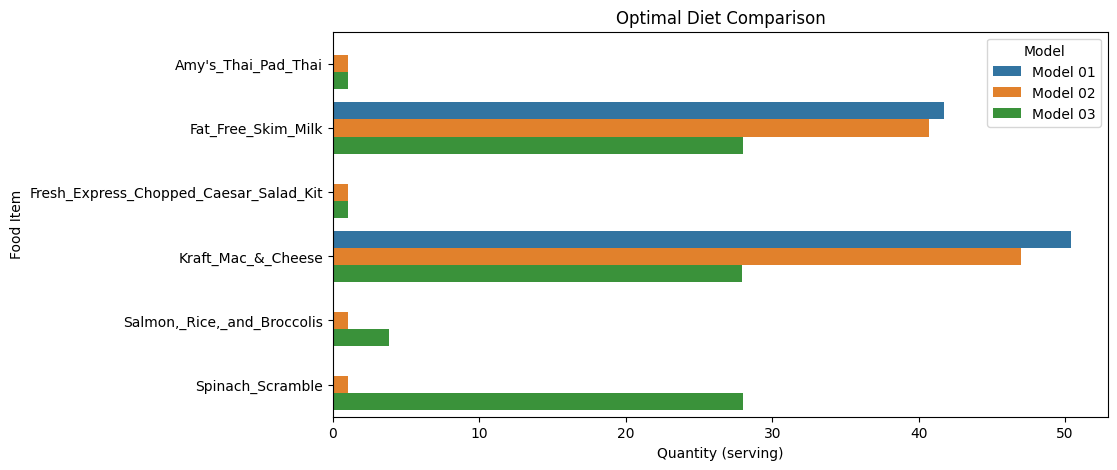

In [338]:
# create a horizontal bar plot to compare the optimal diet for the three models
# add to the hue parameter the Model column
# use sns to create the plot
# remove food item from the y-axis
# save the plot to a file png entire figure size
# tick labels on the y-axis based on the sum of the quantity of the food items
# display the plot

import seaborn as sns
plt.figure(figsize=(10, 5))
sns.barplot(x='Quantity', y='Food Item', hue='Model', data=optimal_diet)
plt.xlabel('Quantity (serving)')
plt.ylabel('Food Item')
plt.title('Optimal Diet Comparison')
plt.savefig('002. Pictures Paper/optimal_diet.png', bbox_inches='tight')
plt.show()


In [339]:
# display table with the food items in the rows and the model in the columns
# quantity as the values

optimal_diet_table = optimal_diet.pivot(index='Food Item', columns='Model', values='Quantity')
optimal_diet_table = optimal_diet_table.round(1)

# create a markdown table
table = optimal_diet_table.to_markdown()

# display the table
print(table)

# save the table to a markdown file
with open('003. Tables/Optimal_Diet_Table.md', 'w') as file:
    file.write(table)

# create a csv file wuth the optimal diet
optimal_diet_table.to_csv('003. Tables/Optimal_Diet_Table.csv')

| Food Item                              |   Model 01 |   Model 02 |   Model 03 |
|:---------------------------------------|-----------:|-----------:|-----------:|
| Amy's_Thai_Pad_Thai                    |        0   |        1   |        1   |
| Fat_Free_Skim_Milk                     |       41.7 |       40.7 |       28   |
| Fresh_Express_Chopped_Caesar_Salad_Kit |        0   |        1   |        1   |
| Kraft_Mac_&_Cheese                     |       50.4 |       47   |       27.9 |
| Salmon,_Rice,_and_Broccolis            |        0   |        1   |        3.9 |
| Spinach_Scramble                       |        0   |        1   |       28   |


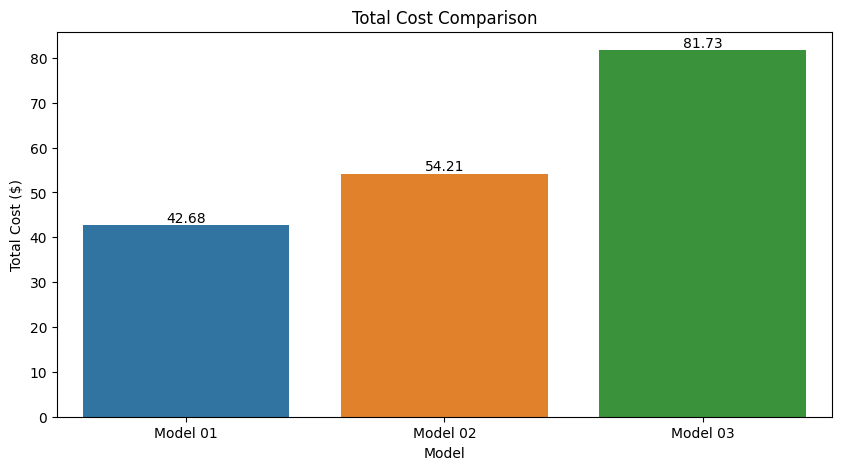

In [340]:
# plot the optimal cost for the three models
# use sns to create the plot
# no need to add standard deviation
# add hue per model
# save the plot to a file png entire figure size
# display the plot
# add the total cost inside each bar of the plot

# calculate the total cost for each model
optimal_cost = optimal_diet.groupby('Model')['Cost'].sum().reset_index()

# create the plot and add the total cost inside each bar

# save the plot to a file png entire figure size inside the folder "002. Pictures Paper"
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Cost', data=optimal_cost, errorbar=None, hue = 'Model')
plt.xlabel('Model')
plt.ylabel('Total Cost ($)')
plt.title('Total Cost Comparison')
for i, cost in enumerate(optimal_cost['Cost']):
    plt.text(i, cost, f'{cost:.2f}', ha='center', va='bottom')
plt.savefig('002. Pictures Paper/total_cost.png', bbox_inches='tight')
plt.show()

In [341]:
# save this code into HTML and pdf format
!jupyter nbconvert --to html Diet_Problem.ipynb

[NbConvertApp] Converting notebook Diet_Problem.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 428204 bytes to Diet_Problem.html
